The dataset was taken from https://www.kaggle.com/datasets/spscientist/students-performance-in-exams.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Machine Learning'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Machine Learning


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('./StudentsPerformance.csv')
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

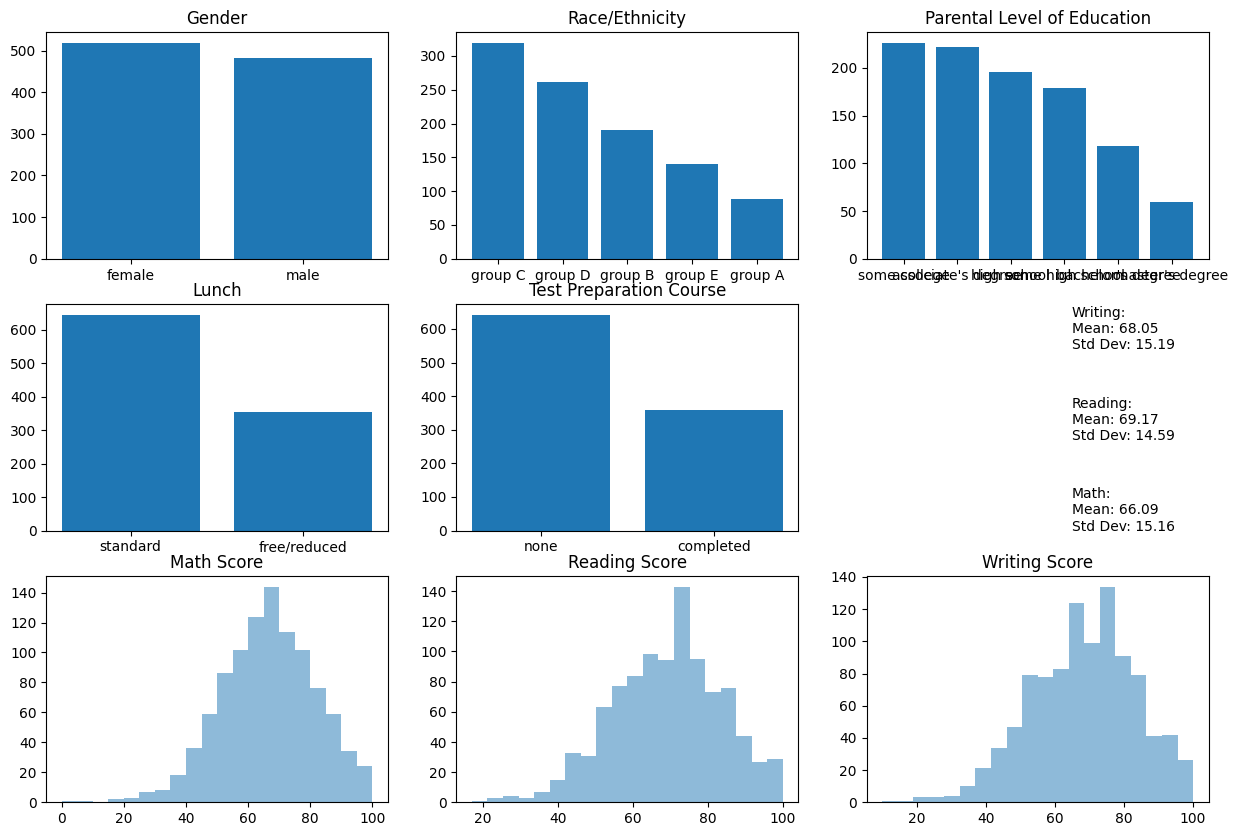

In [ ]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

gender_counts = df['gender'].value_counts()
axs[0, 0].bar(gender_counts.index, gender_counts.values)
axs[0, 0].set_title('Gender')

ethnicity_counts = df['race/ethnicity'].value_counts()
axs[0, 1].bar(ethnicity_counts.index, ethnicity_counts.values)
axs[0, 1].set_title('Race/Ethnicity')

parental_counts = df['parental level of education'].value_counts()
axs[0, 2].bar(parental_counts.index, parental_counts.values)
axs[0, 2].set_title('Parental Level of Education')

lunch_counts = df['lunch'].value_counts()
axs[1, 0].bar(lunch_counts.index, lunch_counts.values)
axs[1, 0].set_title('Lunch')

prep_counts = df['test preparation course'].value_counts()
axs[1, 1].bar(prep_counts.index, prep_counts.values)
axs[1, 1].set_title('Test Preparation Course')

axs[1, 2].axis('off')

axs[2, 0].hist(df['math score'], bins=20, alpha=0.5)
axs[2, 0].set_title('Math Score')
mean = np.mean(df['math score'])
std = np.std(df['math score'])
axs[1, 2].text(0.6, 0.0, f"Math:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

axs[2, 1].hist(df['reading score'], bins=20, alpha=0.5)
axs[2, 1].set_title('Reading Score')
mean = np.mean(df['reading score'])
std = np.std(df['reading score'])
axs[1, 2].text(0.6, 0.4, f"Reading:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

axs[2, 2].hist(df['writing score'], bins=20, alpha=0.5)
axs[2, 2].set_title('Writing Score')
mean = np.mean(df['writing score'])
std = np.std(df['writing score'])
axs[1, 2].text(0.6, 0.8, f"Writing:\nMean: {mean:.2f}\nStd Dev: {std:.2f}")

plt.show()

In [ ]:
education_map = {'some high school': 0, 'high school': 1, 'some college': 2, 
                 "associate's degree": 3, "bachelor's degree": 4, "master's degree": 5}
df['parental level of education'] = df['parental level of education'].replace(education_map)

lunch_map = {'free/reduced': 0, 'standard': 1}
df['lunch'] = df['lunch'].replace(lunch_map)

test_map = {'none': 0, 'completed': 1}
df['test preparation course'] = df['test preparation course'].replace(test_map)


In [ ]:
def one_hot_encoding(dataframe, category):
  one_hot_encoded = pd.get_dummies(dataframe[category])
  df_encoded = pd.concat([dataframe, one_hot_encoded], axis=1)
  return df_encoded

In [ ]:
categories = ['gender', 'race/ethnicity']

for category in categories:
    df = one_hot_encoding(df, category)

<Axes: ylabel='math score'>

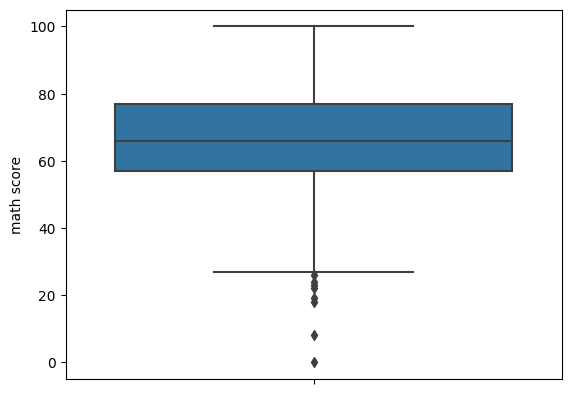

In [ ]:
import seaborn as sns

sns.boxplot(data=df, y="math score")

In [ ]:
Q1 = df["math score"].quantile(0.25)
Q3 = df["math score"].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5*IQR

df = df[df["math score"] < threshold]

In [ ]:
# import numpy as np
# from scipy.spatial.distance import mahalanobis

# X = df[['math score', 'reading score', 'writing score']]
# cov = np.cov(X.T)
# inv_covmat = np.linalg.inv(cov)
# mean = np.mean(X)
# df['mahalanobis'] = [mahalanobis(X.iloc[i], mean, inv_covmat) for i in range(len(X))]

# threshold = df['mahalanobis'].quantile(0.025)
# df = df[df['mahalanobis'] <= threshold]

In [ ]:
df['math score discretized'] = df['math score'].apply(lambda x: 1 if x >= 50 else 0)

We could just use LinearRegression istead of Logistic one with *discretization*

In [ ]:
print(df)

     gender race/ethnicity  parental level of education  lunch  \
0    female        group B                            4      1   
1    female        group C                            2      1   
2    female        group B                            5      1   
3      male        group A                            3      0   
4      male        group C                            2      1   
..      ...            ...                          ...    ...   
995  female        group E                            5      1   
996    male        group C                            1      0   
997  female        group C                            1      0   
998  female        group D                            2      1   
999  female        group D                            2      0   

     test preparation course  math score  reading score  writing score  \
0                          0          72             72             74   
1                          1          69             90    

In [35]:
import sklearn
from sklearn.preprocessing import minmax_scale

df_norm = minmax_scale(df, axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9940d70d30>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9940cf3490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9940d70a90>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9940cf35b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9940cf3a90>,
 'means': []}

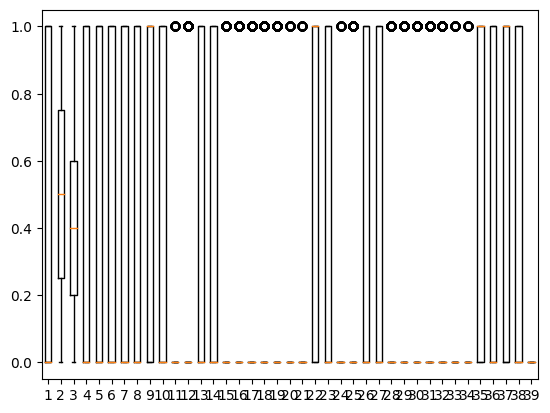

In [36]:
plt.boxplot(df_norm)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f994088b6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f994088bc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f994088b430>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9940898190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9940898430>],
 'means': []}

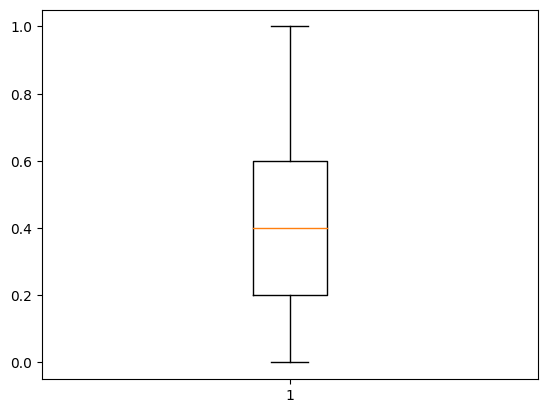

In [39]:
plt.boxplot(df_norm[:,2])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

prediction_data = df[['female', 'male', 'parental level of education', 'lunch', 'test preparation course']];
class_data = df['math score discretized'];

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.855


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(prediction_data, class_data, test_size=0.2)
model = LogisticRegression()
for n in range(1, len(X_train.columns) + 1):
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    print('n_components:', n, 'Accuracy:', accuracy)

n_components: 1 Accuracy: 0.86
n_components: 2 Accuracy: 0.86
n_components: 3 Accuracy: 0.86
n_components: 4 Accuracy: 0.855
n_components: 5 Accuracy: 0.855
